In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

## 2.SVM的由来

[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]
 [ 1.71444449  5.02521524]
 [ 0.22459286  4.77028154]
 [ 1.06923853  4.53068484]
 [ 1.53278923  0.55035386]
 [ 1.4949318   3.85848832]
 [ 1.1641107   3.79132988]
 [ 0.74387399  4.12240568]
 [ 2.29667251  0.48677761]
 [ 0.44359863  3.11530945]
 [ 0.91433877  4.55014643]
 [ 1.67467427  0.68001896]
 [ 2.26908736  1.32160756]
 [ 1.5108885   0.9288309 ]
 [ 1.65179125  0.68193176]
 [ 2.49272186  0.97505341]
 [ 2.33812285  3.43116792]
 [ 0.67047877  4.04094275]
 [-0.55552381  4.69595848]
 [ 2.16172321  0.6565951 ]
 [ 2.09680487  3.7174206 ]
 [ 2.18023251  1.48364708]
 [ 0.43899014  4.53592883]
 [ 1.24258802  4.50399192]
 [ 0.00793137  4.17614316]
 [ 1.89593761  5.18540259]
 [ 1.868336    0.93136287]
 [ 2.13141478  1.13885728]
 

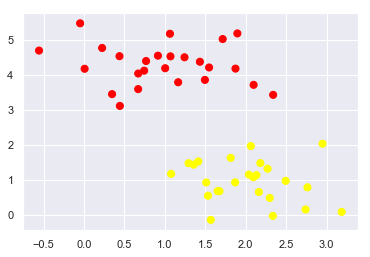

In [20]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)
print(X); print(y)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')

(-1, 3.5)

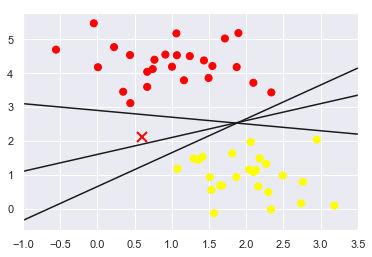

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plt.plot([0.6], [2.1], 'x', color = 'red', markeredgewidth = 2, markersize = 10)
for a, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yfit = a * xfit + b
    plt.plot(xfit, yfit, '-k')
plt.xlim(-1, 3.5)

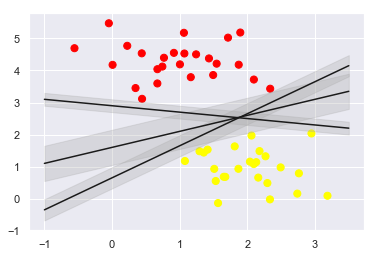

In [10]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')

for a, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = a * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = '#AAAAAA', alpha = 0.3)

## 2.拟合线性(kernel = 'linear')SVC

In [12]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
def plot_svc_decision_function(model, ax= None, plot_support = True):
    """画二维SVC的决策函数"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 创建评估模型的网格
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # 画决策边界和边界
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    # 画支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, linewidth = 1, facecolors = 'none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)    

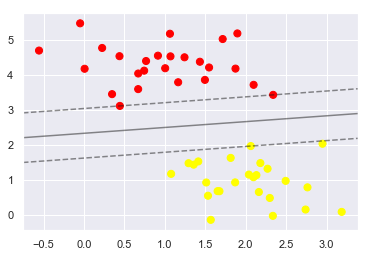

In [16]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(model)

In [17]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

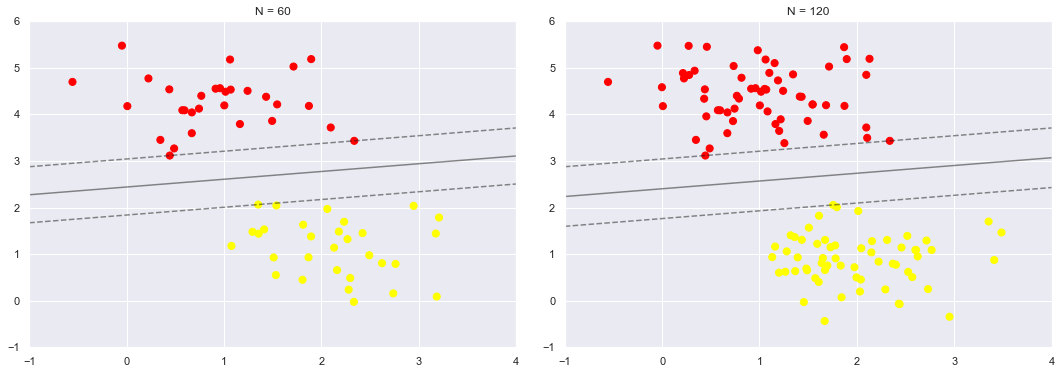

In [18]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=N, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [19]:
from ipywidgets import interact, fixed
interact(plot_svm, N = [10, 200], ax = fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

## 3.拟合非线性(kernel = '')SVC

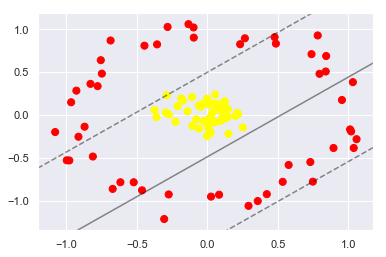

In [24]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor = 0.1, noise = 0.1)
clf = SVC(kernel = 'linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(clf, plot_support = False)

In [31]:
r = np.exp(-(X ** 2).sum(1))

In [37]:
from mpl_toolkits import mplot3d

def plot_3D(elev = 30, azim = 30, X = X, y = y):
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c = y, s = 50, cmap = 'autumn')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
interact(plot_3D, elev = [0, 15, 30, 45, 60, 75, 90], azip = (-180, 180), X = fixed(X), y = fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(0, 15, 30, 45, 60, 75, 90), value=30), In…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.1078888 , -0.02278065],
       [ 0.02685693, -0.94961092],
       [ 0.10432343,  0.12497575],
       [ 0.35807726, -1.00143243],
       [-0.9280047 ,  0.28438948],
       [ 0.05550875, -0.08482053],
       [ 0.79615286,  0.4802156 ],
       [ 0.06014491,  0.13354883],
       [-0.02448445, -0.06826923],
       [ 0.15026925, -0.21781191],
       [ 0.1989751 , -0.00951632],
       [ 0.04928514, -0.07506187],
       [-0.28740498,  0.23067998],
       [ 0.73952432,  0.70954606],
       [-0.6854425 ,  0.86843094],
       [ 1.03884138, -0.38329394],
       [ 0.04177293, -0.08471638],
       [ 0.42254821, -0.92128918],
       [-0.82799627,  0.36326937],
       [ 1.0588413 , -0.28086124],
       [-0.46257682, -0.87633645],
       [-0.07798165, -0.04933836],
       [-0.86990807, -0.13547082],
       [ 0.21790603,  0.0077777 ],
       [ 0.53519404, -0.77745701],
       [-0.00976528, -0.07577972],
       [-0.05909855,  0.11181991],
       [